## Distribución Chi-cuadrada ($\chi^2$)

La **distribución Chi-cuadrada** es una distribución de probabilidad continua que surge como la **suma de los cuadrados de variables aleatorias normales estándar independientes**.

---

### 📘 Definición formal

Si $Z_1, Z_2, \dots, Z_k$ son variables aleatorias independientes tales que $Z_i \sim \mathcal{N}(0, 1)$, entonces la variable:

$$
X = \sum_{i=1}^k Z_i^2
$$

sigue una distribución Chi-cuadrada con $k$ grados de libertad, denotada por:

$$
X \sim \chi^2(k)
$$

---

### 📌 Características

- **Soporte:** $x \in [0, \infty)$
- **Forma:** Asimétrica hacia la derecha. Se vuelve más simétrica al aumentar $k$.
- **Media:** $\mathbb{E}[X] = k$
- **Varianza:** $\text{Var}(X) = 2k$
- **Moda:** $k - 2$ (si $k \geq 2$)

---

### 🔍 Aplicaciones

- Pruebas de hipótesis como la **prueba Chi-cuadrada de bondad de ajuste** o de **independencia**.
- En inferencia estadística, aparece en la estimación de varianzas.
- En análisis de varianza (ANOVA).
- En construcción de intervalos de confianza para la varianza.

---

### 📊 Comportamiento

- Para $k = 1$, la distribución es altamente sesgada a la derecha.
- A medida que $k$ aumenta, se vuelve más parecida a una distribución normal.



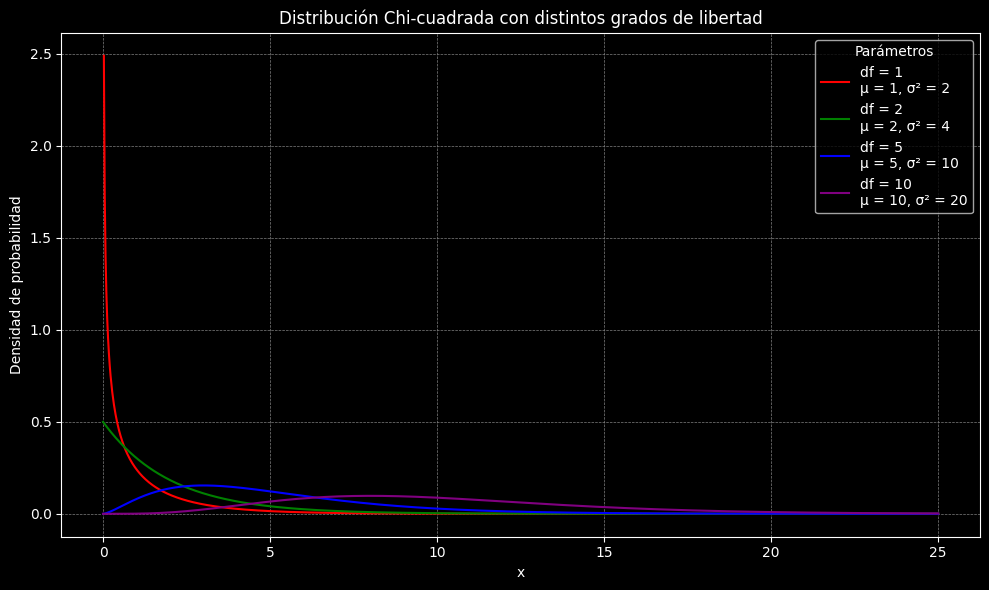

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

plt.style.use('dark_background')

# Valores de grados de libertad que queremos comparar
df_values = [1, 2, 5, 10]
x = np.linspace(0, 25, 1000)

# Crear el gráfico
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue', 'purple']

for df, color in zip(df_values, colors):
    y = chi2.pdf(x, df)
    plt.plot(x, y, label=f'df = {df}\nμ = {df}, σ² = {2*df}', color=color)

plt.title("Distribución Chi-cuadrada con distintos grados de libertad")
plt.xlabel("x")
plt.ylabel("Densidad de probabilidad")
plt.legend(title="Parámetros", loc="upper right")
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


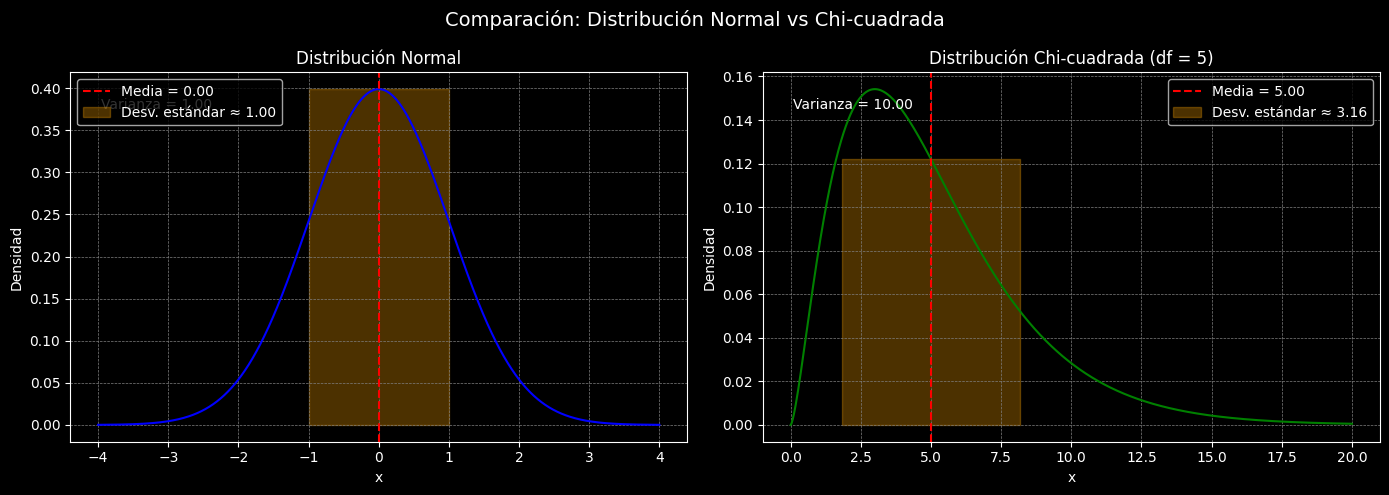

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2

# Parámetros de las distribuciones
mu = 0
sigma = 1
df = 5  # grados de libertad para chi-cuadrada

# Rangos de valores
x_norm = np.linspace(-4, 4, 1000)
x_chi2 = np.linspace(0, 20, 1000)

# PDFs
pdf_norm = norm.pdf(x_norm, mu, sigma)
pdf_chi2 = chi2.pdf(x_chi2, df)

# Estadísticas
# Normal
norm_mean = mu
norm_var = sigma ** 2
norm_std = sigma

# Chi-cuadrada
chi2_mean = df
chi2_var = 2 * df
chi2_std = np.sqrt(chi2_var)

# Gráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribución Normal
axes[0].plot(x_norm, pdf_norm, color='blue')
axes[0].set_title("Distribución Normal")
axes[0].set_xlabel("x")
axes[0].set_ylabel("Densidad")
axes[0].grid(color='gray', linestyle='--', linewidth=0.5)
axes[0].axvline(norm_mean, color='red', linestyle='--', label=f'Media = {norm_mean:.2f}')
axes[0].fill_betweenx([0, norm.pdf(norm_mean, mu, sigma)], 
                      norm_mean - norm_std, norm_mean + norm_std, 
                      color='orange', alpha=0.3, label=f'Desv. estándar ≈ {norm_std:.2f}')
axes[0].legend(loc='upper left')
axes[0].text(0.05, 0.9, f'Varianza = {norm_var:.2f}', transform=axes[0].transAxes)

# Distribución Chi-cuadrada
axes[1].plot(x_chi2, pdf_chi2, color='green')
axes[1].set_title("Distribución Chi-cuadrada (df = 5)")
axes[1].set_xlabel("x")
axes[1].set_ylabel("Densidad")
axes[1].grid(color='gray', linestyle='--', linewidth=0.5)
axes[1].axvline(chi2_mean, color='red', linestyle='--', label=f'Media = {chi2_mean:.2f}')
axes[1].fill_betweenx([0, chi2.pdf(chi2_mean, df)], 
                      chi2_mean - chi2_std, chi2_mean + chi2_std, 
                      color='orange', alpha=0.3, label=f'Desv. estándar ≈ {chi2_std:.2f}')
axes[1].legend(loc='upper right')
axes[1].text(0.05, 0.9, f'Varianza = {chi2_var:.2f}', transform=axes[1].transAxes)

plt.suptitle("Comparación: Distribución Normal vs Chi-cuadrada", fontsize=14)
plt.tight_layout()
plt.show()


In [1]:
import numpy as np
from scipy.stats import chi2_contingency

# Tabla de contingencia: filas = género, columnas = preferencia
# [ [Hombres que gustan, Hombres que no gustan],
#   [Mujeres que gustan, Mujeres que no gustan] ]
tabla = np.array([[30, 20],
                  [10, 40]])

# Aplicar prueba chi cuadrado de independencia
chi2, p_valor, gl, frecuencias_esperadas = chi2_contingency(tabla)

# Mostrar resultados
print(f"Chi cuadrado calculado: {chi2:.2f}")
print(f"Grados de libertad: {gl}")
print(f"Valor p: {p_valor:.4f}")
print("Frecuencias esperadas:")
print(frecuencias_esperadas)

# Decisión
alpha = 0.05
if p_valor < alpha:
    print("Conclusión: Rechazamos H₀ → Hay relación entre género y preferencia.")
else:
    print("Conclusión: No se puede rechazar H₀ → No hay evidencia de relación.")


Chi cuadrado calculado: 15.04
Grados de libertad: 1
Valor p: 0.0001
Frecuencias esperadas:
[[20. 30.]
 [20. 30.]]
Conclusión: Rechazamos H₀ → Hay relación entre género y preferencia.
